In [1]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
import scipy.stats
import pandas as pd
from pydataset import data
import pylab as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import norm
%matplotlib notebook
#df = data('bfi').fillna(0)
df = data('iris')

## Simple Fakification

<IPython.core.display.Javascript object>


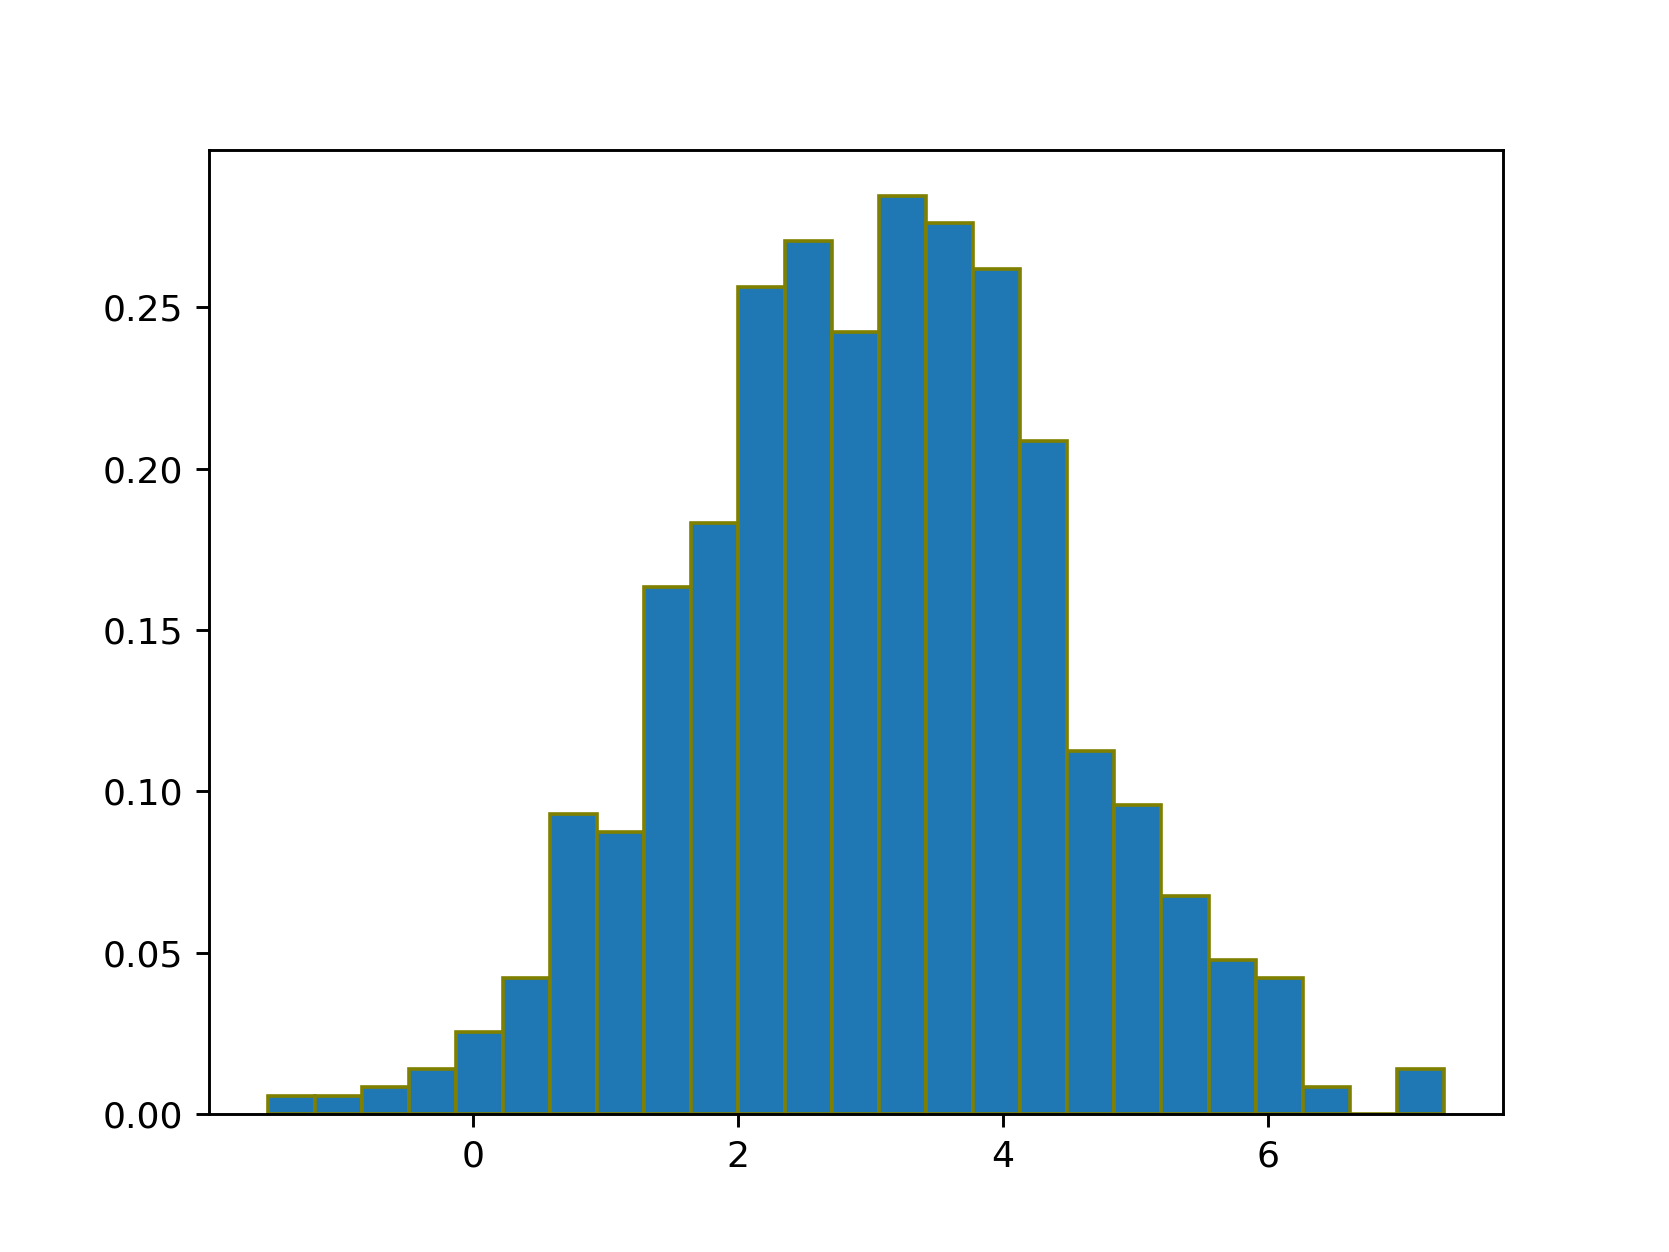

interactive(children=(Checkbox(value=False, description='show_fit'), Output()), _dom_classes=('widget-interact',))

In [2]:

f0,ax0=plt.subplots()
mu = 3
sigma = 1.4
n = 1000
randnums = norm.rvs(mu,sigma,n)
xbar0 = np.mean(randnums)
s0 = np.std(randnums)

def func0(show_fit=False):
    ax0.clear()
    h0 = ax0.hist(randnums, 25, density=True,edgecolor='olive')
    
    if show_fit:
        x = np.linspace(norm.ppf(0.01,mu,sigma),norm.ppf(0.99,mu,sigma), 100)
        ax0.plot(x,norm.pdf(x,mu,sigma), color='orange')
        ax0.set_title('Mean:%f    Std:%f'%(xbar0,s0))
        
        
i0 =interact(func0,show_fit=False)




<IPython.core.display.Javascript object>


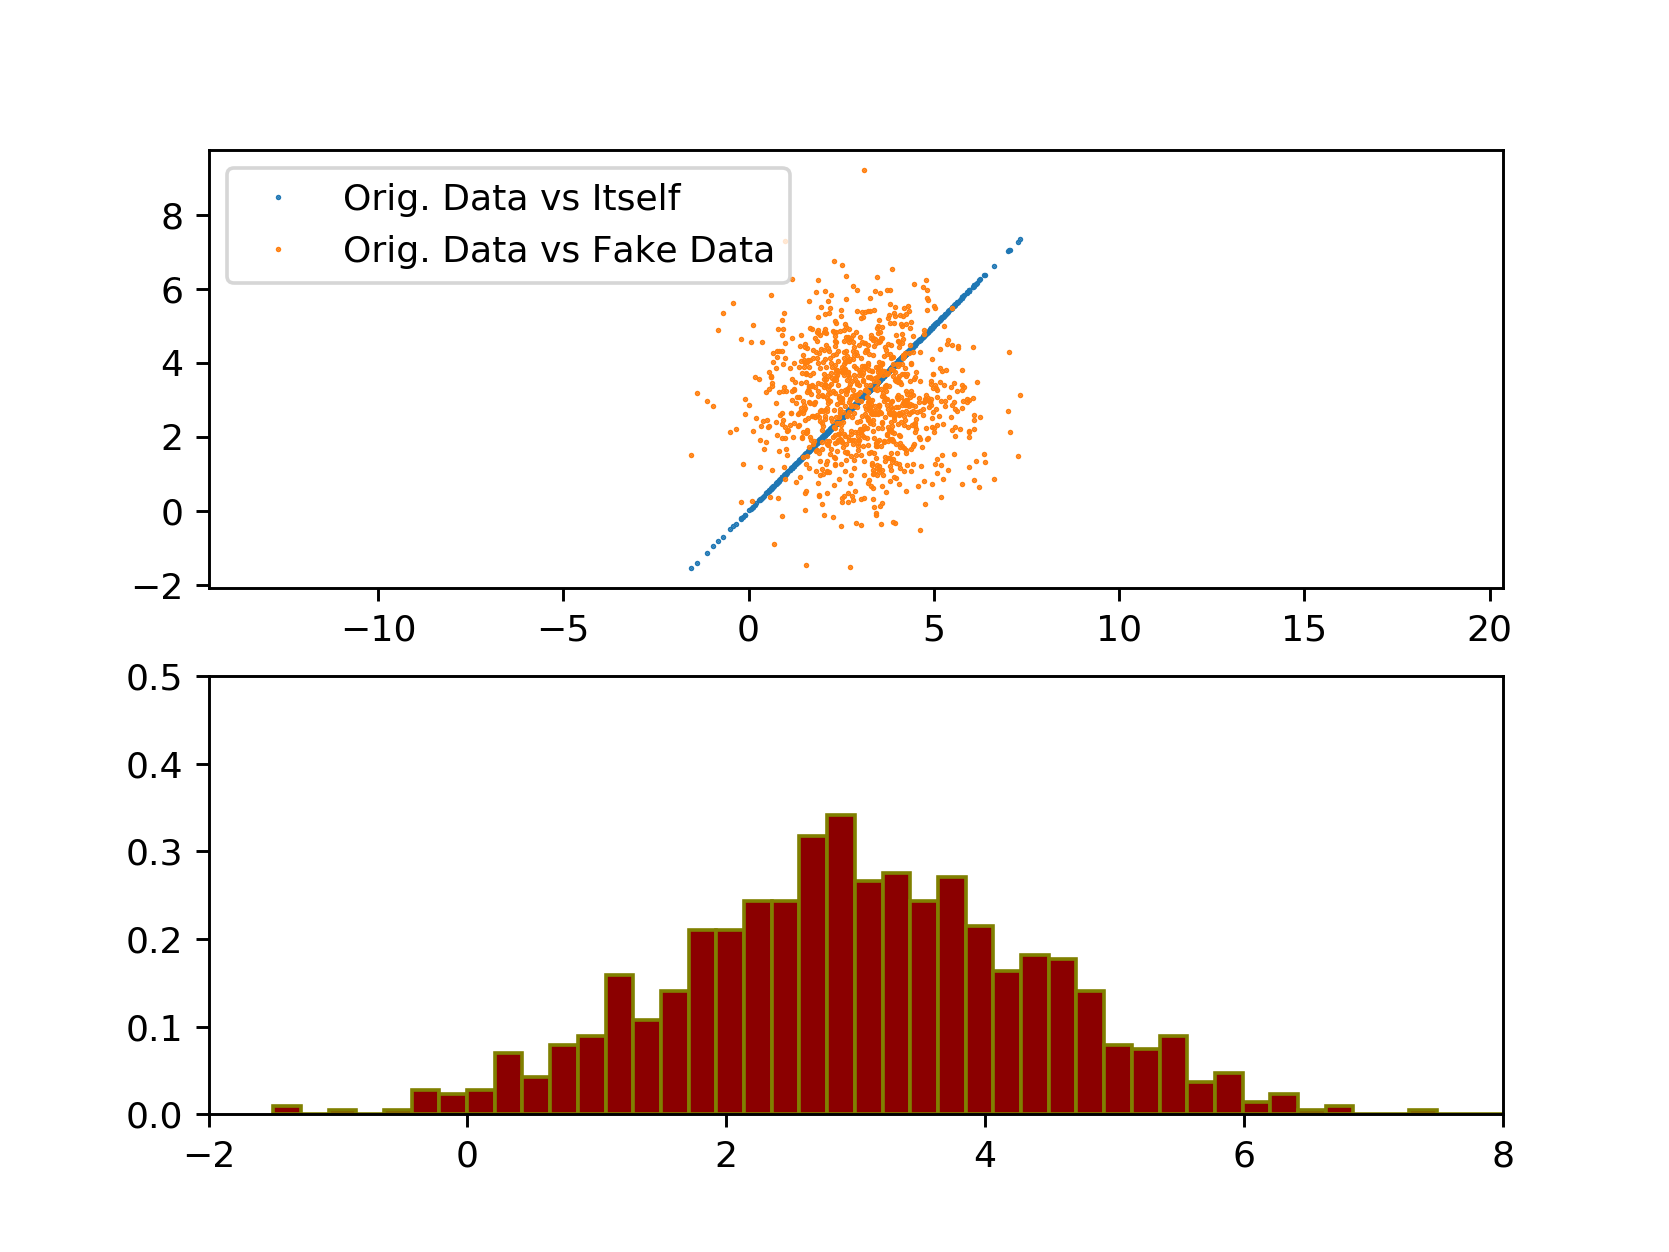

interactive(children=(Dropdown(description='show_hist', options=('new', 'both', 'old'), value='new'), Output()), _dom_classes=('widget-interact',))

In [3]:
#plt.figure(1)
f1,ax1 = plt.subplots()
ax1_1 = plt.subplot(211)
new_data = norm.rvs(xbar0,s0,n)
ax1_1.plot(randnums,randnums,'.',markersize=1, label='Orig. Data vs Itself')
ax1_1.plot(randnums,new_data,'.',markersize=1, label='Orig. Data vs Fake Data')
ax1_1.axis('equal')
L1 = ax1_1.legend()

ax1_2 = plt.subplot(212)


def func1(show_hist):
    ax1_2.clear()
    if (show_hist == 'old') or (show_hist == 'both'):
        ax1_2.hist(randnums, 50, density=True,edgecolor='olive')
        
    if (show_hist == 'new') or (show_hist == 'both'):
        ax1_2.hist(new_data, 50, density=True,color='darkred',edgecolor='olive')
    plt.axis([-2,8,0,0.5])

i1 =  interact(func1,show_hist=['new','both','old'])

# Gaussian Multivariate Fakerizing 
## The Infamous Iris Data Set
* Rows: Individual Flowers
* Columns:  
 * Measurements of Petals (Ratio-Level) 
 * Species (Nominal-Level)

In [4]:
df.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
34,5.5,4.2,1.4,0.2,setosa
110,7.2,3.6,6.1,2.5,virginica
82,5.5,2.4,3.7,1.0,versicolor
102,5.8,2.7,5.1,1.9,virginica
5,5.0,3.6,1.4,0.2,setosa
41,5.0,3.5,1.3,0.3,setosa
114,5.7,2.5,5.0,2.0,virginica
112,6.4,2.7,5.3,1.9,virginica
89,5.6,3.0,4.1,1.3,versicolor
35,4.9,3.1,1.5,0.2,setosa


## Measurements are Correlated!

<IPython.core.display.Javascript object>


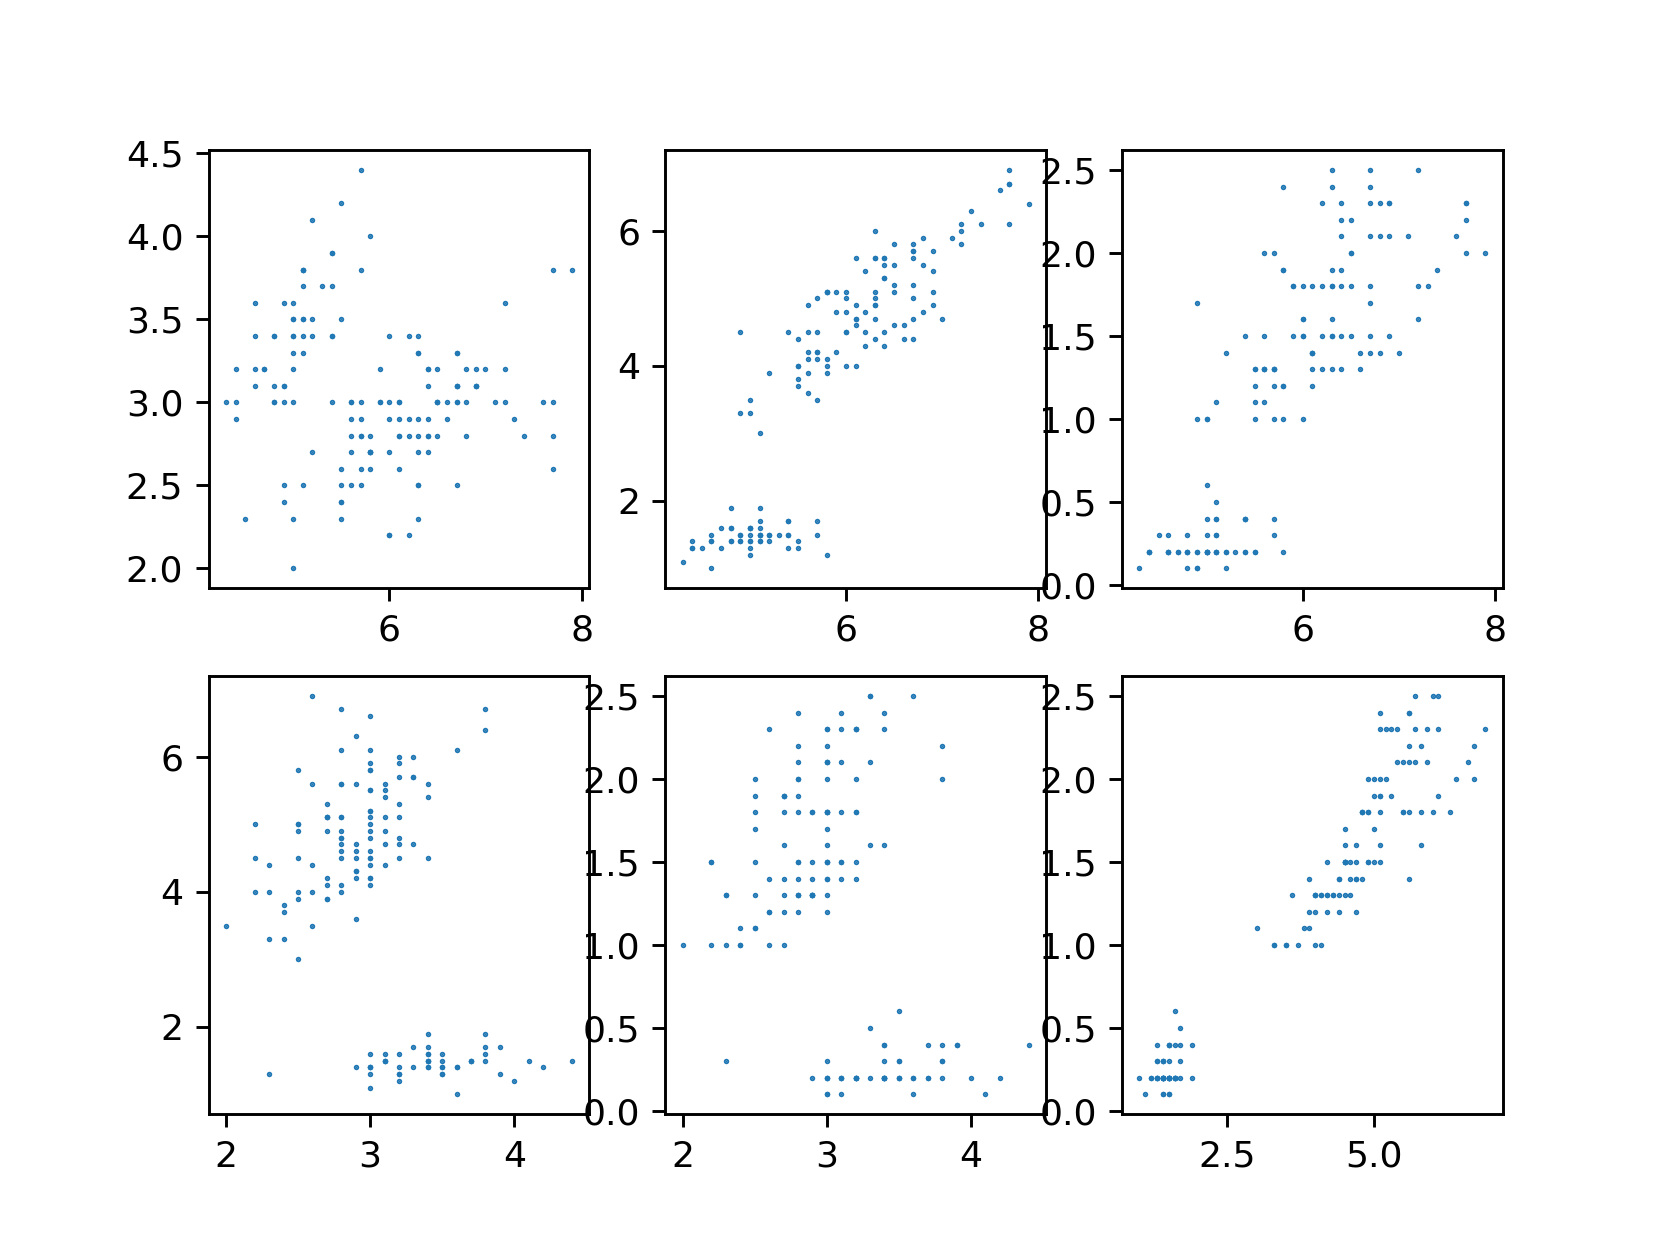

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [5]:
%matplotlib notebook
plt.figure(3)
plt.subplot(2,3,1)
plt.plot(df['Sepal.Length'],df['Sepal.Width'],'.',markersize=1)
plt.subplot(2,3,2)
plt.plot(df['Sepal.Length'],df['Petal.Length'],'.',markersize=1)
plt.subplot(2,3,3)
plt.plot(df['Sepal.Length'],df['Petal.Width'],'.',markersize=1)
plt.subplot(2,3,4)
plt.plot(df['Sepal.Width'],df['Petal.Length'],'.',markersize=1)
plt.subplot(2,3,5)
plt.plot(df['Sepal.Width'],df['Petal.Width'],'.',markersize=1)
plt.subplot(2,3,6)
plt.plot(df['Petal.Length'],df['Petal.Width'],'.',markersize=1)
df.corr()

<IPython.core.display.Javascript object>


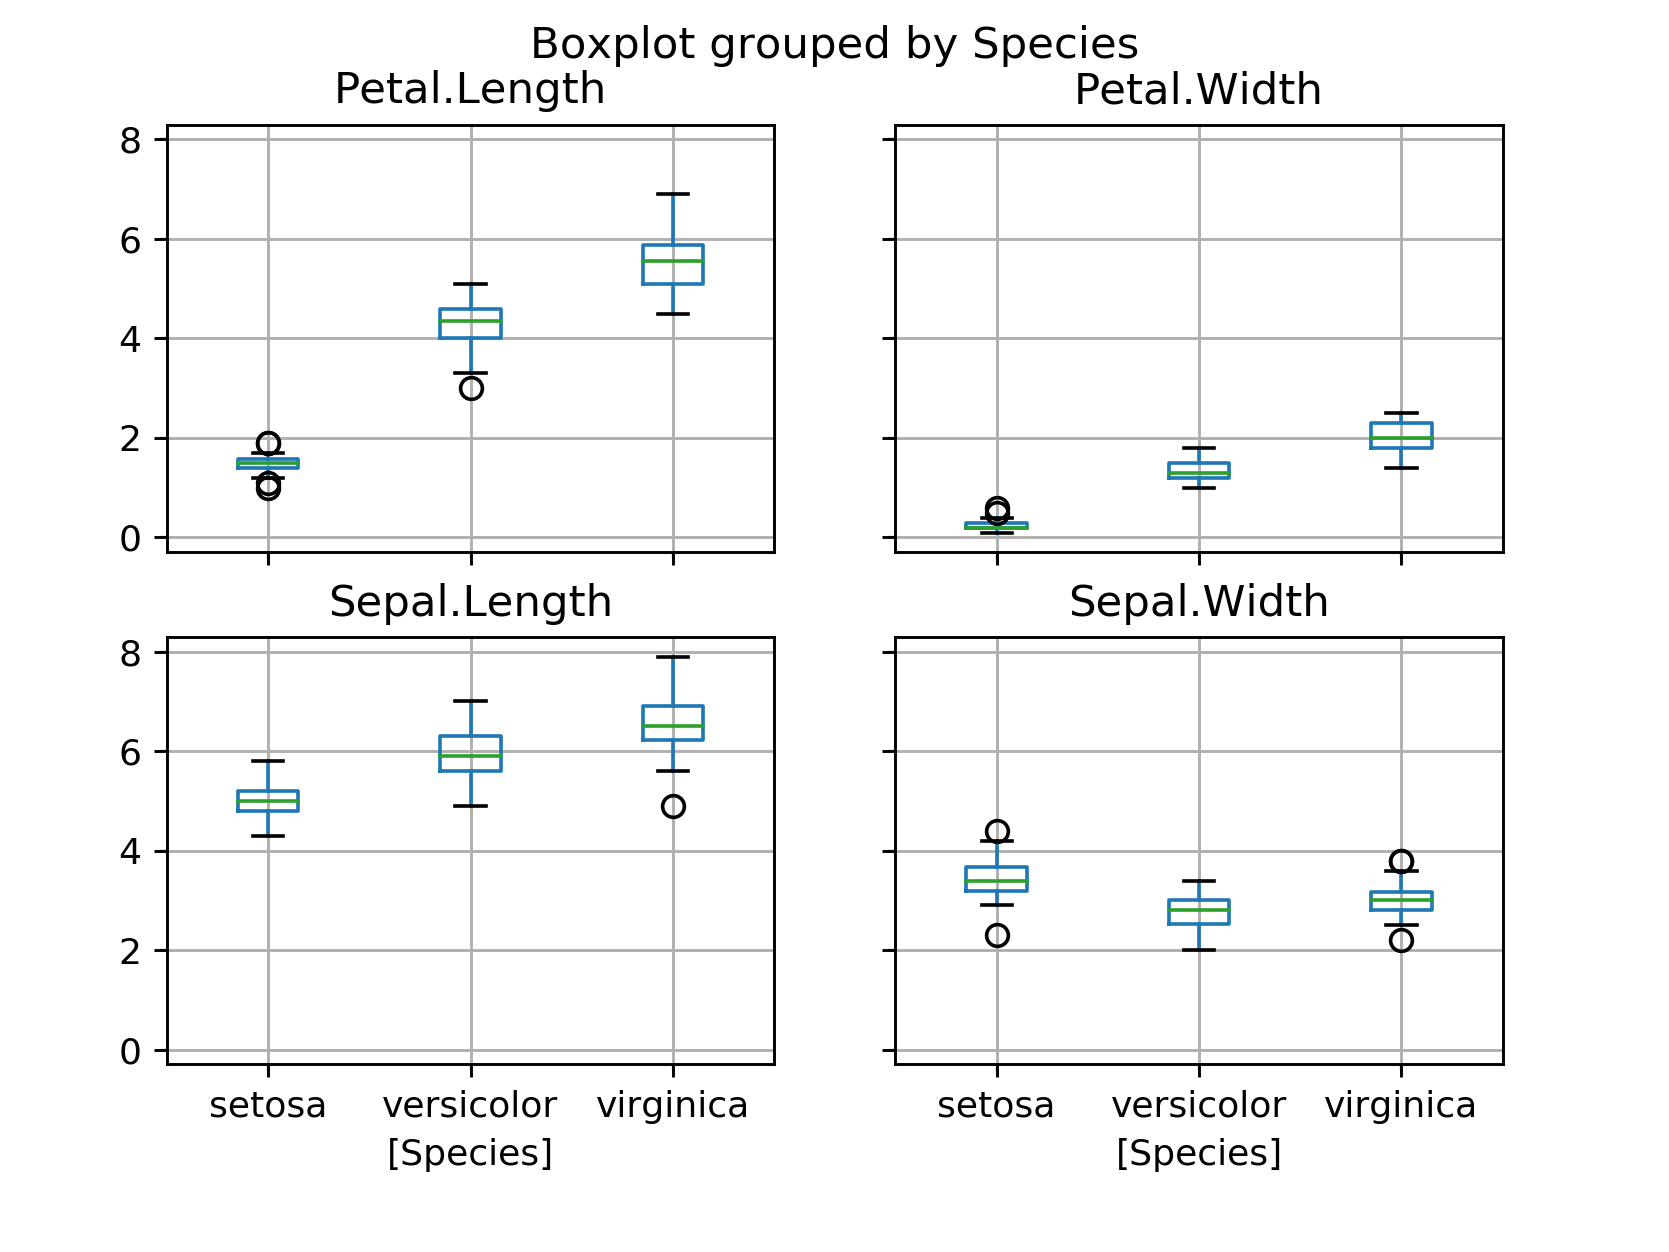

In [6]:
#plt.figure(4)
f4=df.boxplot(by="Species")

## Covariance structure contains useful information

In [7]:
df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


## Generate multivariate normal with that covariance structure

<IPython.core.display.Javascript object>


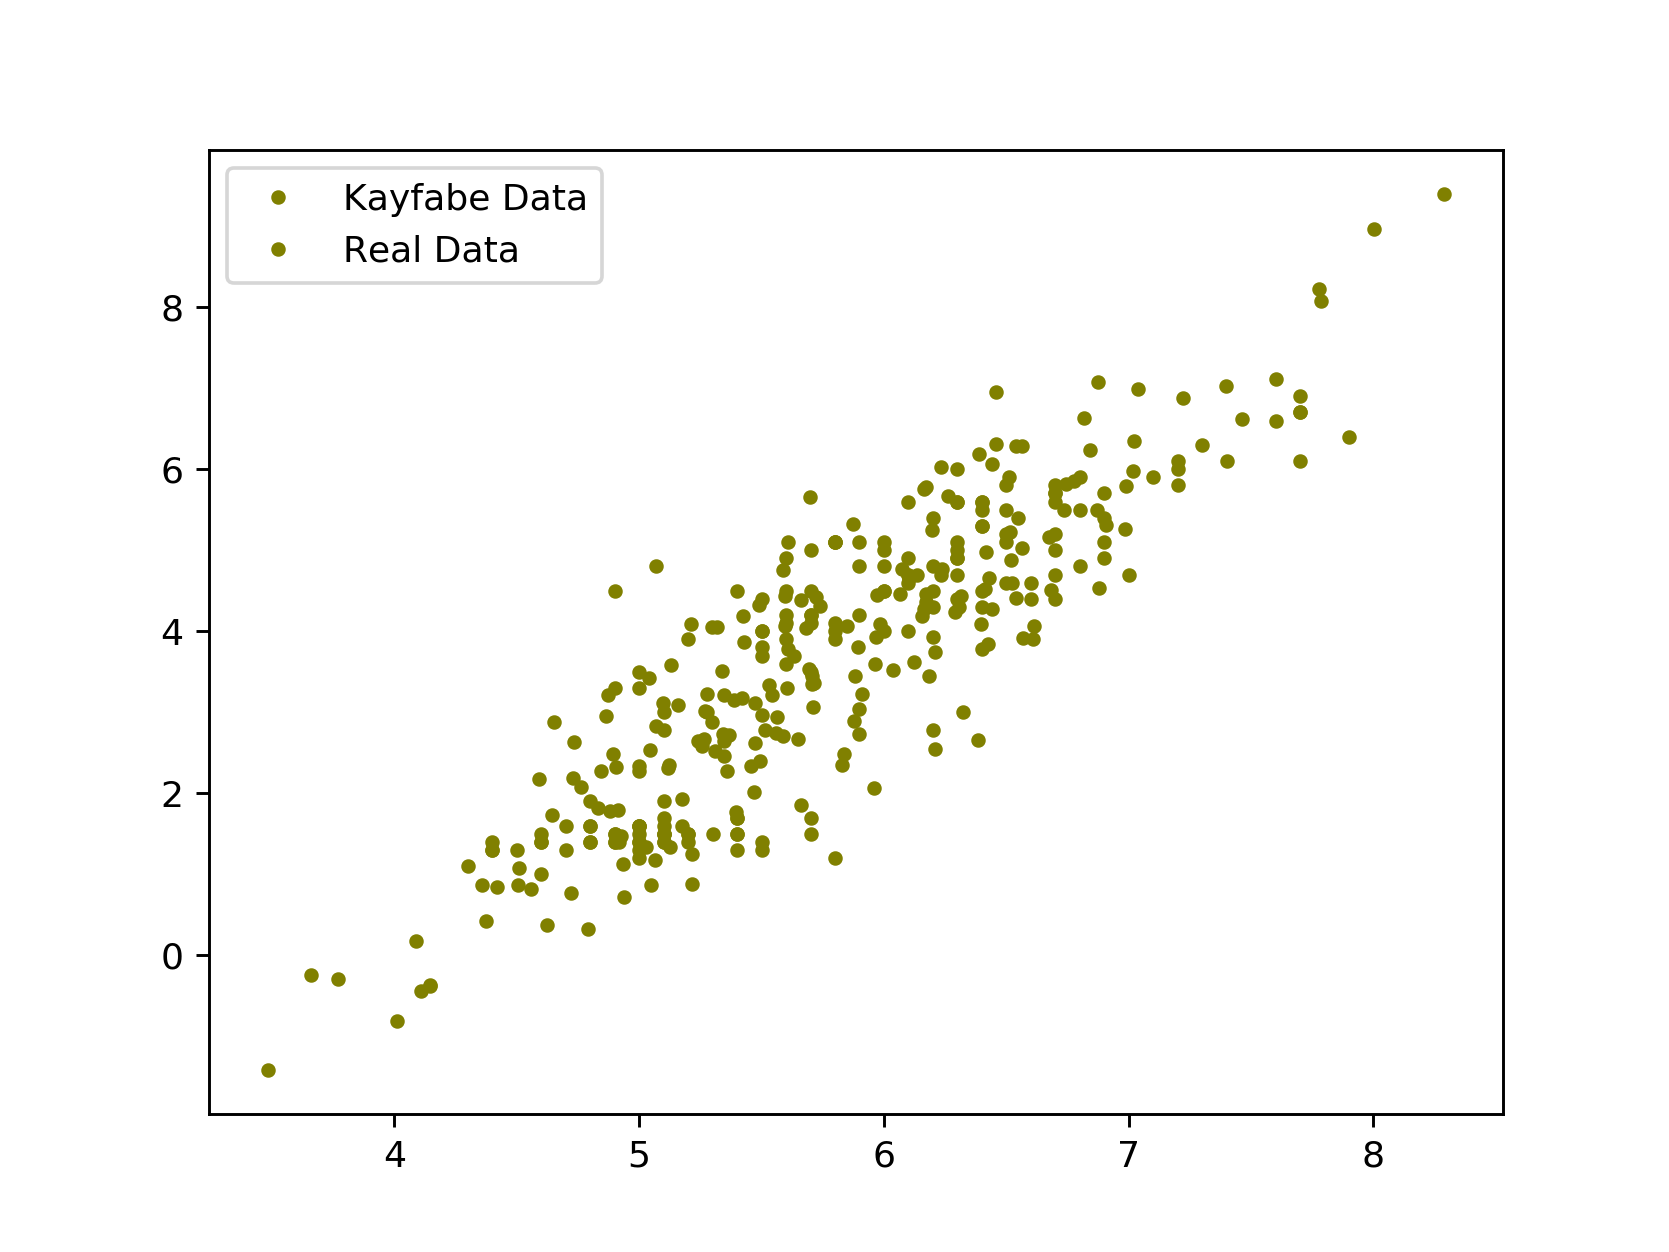

interactive(children=(Dropdown(description='color', options=('white', 'orange', 'olive'), value='white'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

In [18]:
import numpy.random as rand
fakes = np.matrix([rand.multivariate_normal(df.mean(),df.cov()) for xx in range(200)])

ff,ax=plt.subplots()
def f(color):
    ax.clear()
    ax.plot(fakes[:,0],fakes[:,2],'.',color=color,label='Kayfabe Data')    
    ax.plot(df['Sepal.Length'], df['Petal.Length'],'.',color='olive',label="Real Data")

    plt.legend()
interact(f,color=['white','orange','olive'])

### Problem 1:  Data aren't exactly normal
### Problem 2: Skipped nominal variables completely

Is there a non-parametric version?



## Kernel Density Estimators (KDEs)

In [12]:
def round_to_set(vals, discreet_set):
    '''Round each value in list-like vals
        to the nearest member of the discrete_set'''
    discreet_set = list(set(discreet_set)) # Only process unique values
    outvals = []
    
    for thisval in vals:
        thisdists = np.abs(np.array([dd - thisval for dd in discreet_set]))
        closestidx = list(thisdists).index(np.min(thisdists))
        outvals.append(discreet_set[closestidx])
        
    return outvals

df = data('iris')
df['Species']=pd.factorize(df['Species'])[0]


<IPython.core.display.Javascript object>


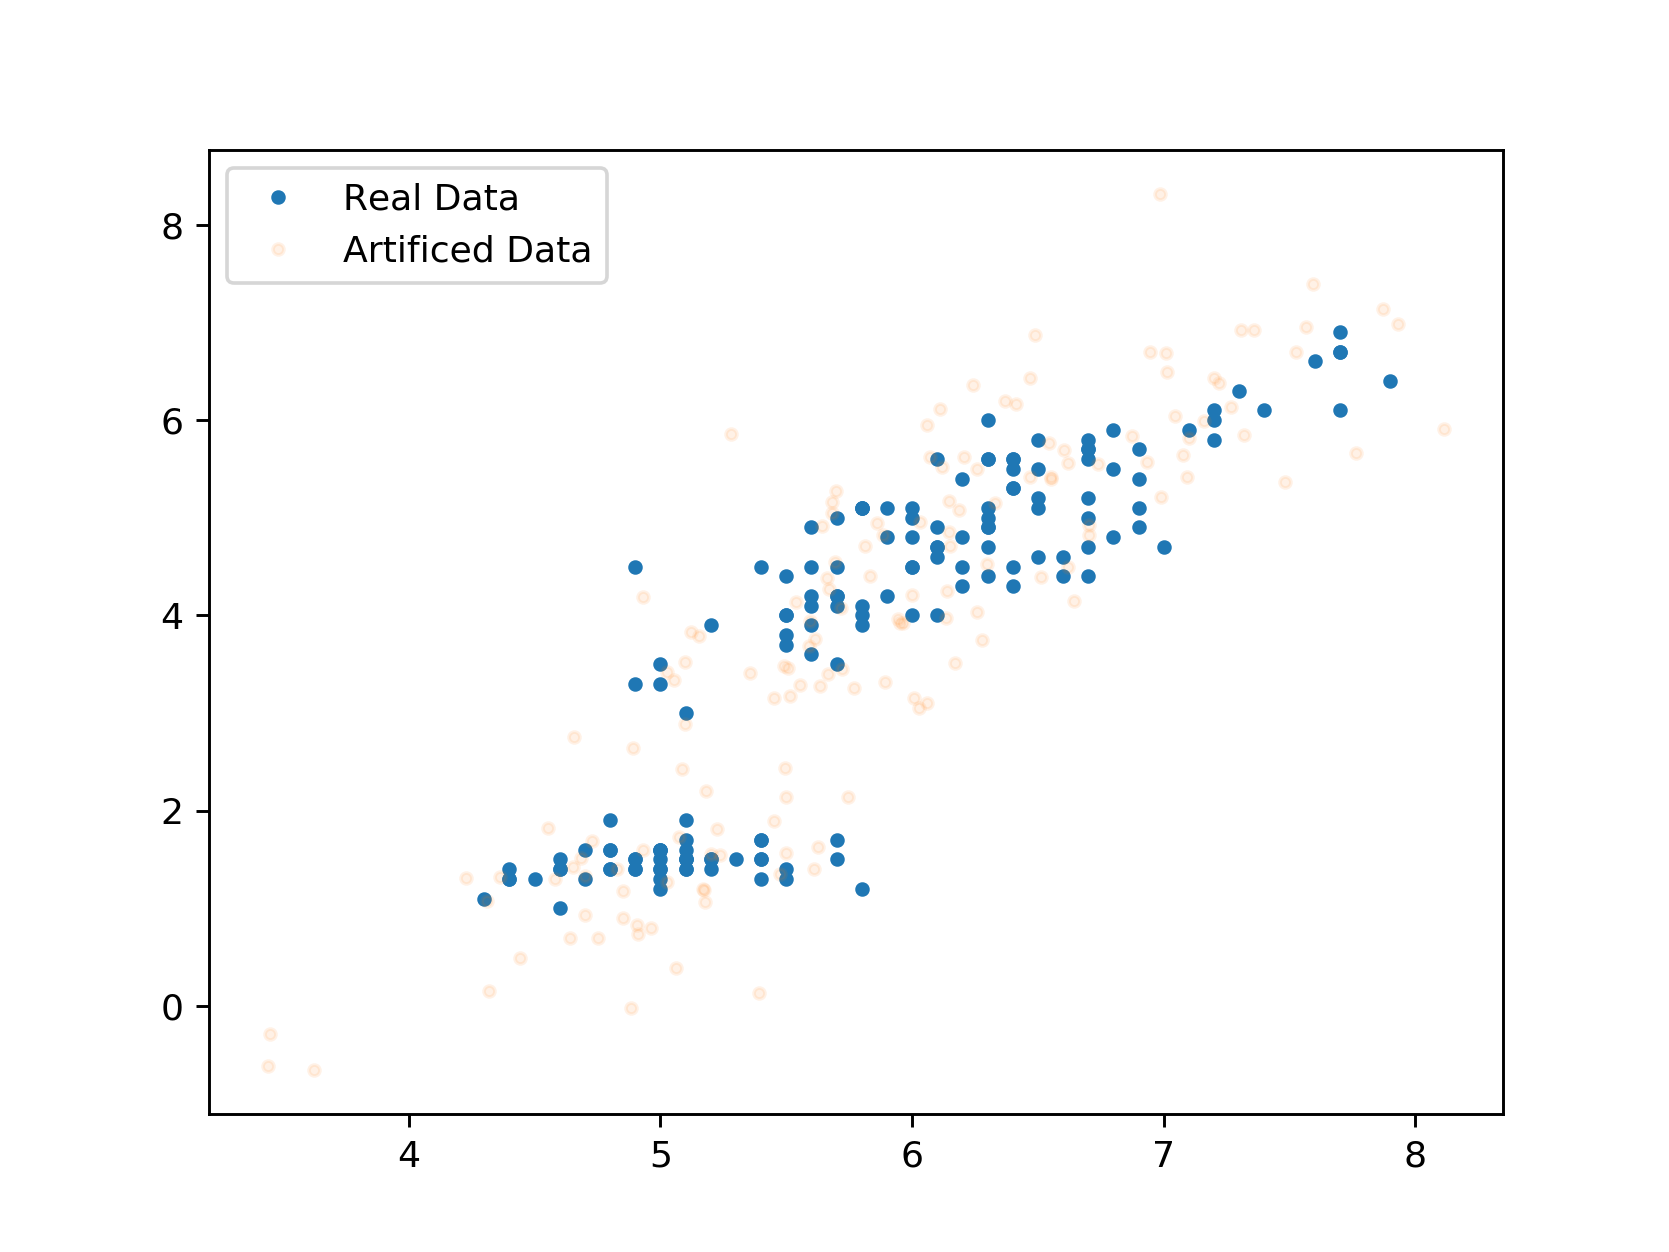

HBox(children=(RadioButtons(options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'), value='Sepal.Length'), RadioButtons(index=2, options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'), value='Petal.Length')))

In [14]:
if 'kd' not in dir():
    d0 = df.iloc[:,[0,1,2,3,4]].transpose()
    kd=scipy.stats.gaussian_kde(d0, bw_method='silverman')
    dnew = dict(zip(df.columns, kd.resample()))
    
    # Discretize the artificed discrete data -- something more clever is probably possible
    dnew['Species'] = round_to_set(dnew['Species'],df['Species'])
    
fig = plt.figure(6)
ax = fig.add_subplot(1, 1, 1)

buttons1 = widgets.RadioButtons(
    options=df.columns,
    value='Sepal.Length')

buttons2 = widgets.RadioButtons(
    options=df.columns,
    value='Petal.Length')

button_box = widgets.HBox([buttons1, buttons2])
display(button_box)

rdat, = ax.plot(df[buttons1.value], df[buttons2.value],'.',label='Real Data')
fkdat, = ax.plot(dnew[buttons1.value], dnew[buttons2.value], '.', label='Artificed Data')
fkdat.set_alpha(0.1)

ax.legend()
fig.canvas.draw()

def update(bork):
    rdat.set_xdata(df[buttons1.value]) 
    rdat.set_ydata(df[buttons2.value])
    fkdat.set_xdata(dnew[buttons1.value])
    fkdat.set_ydata(dnew[buttons2.value])
    ax.relim()
    ax.autoscale(enable=True)

buttons1.observe(update)
buttons2.observe(update)